#                        Homework 1
###     Peng Wei                                                                ID: 12208412

## Problem1: Data Acquisition and Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pb_1 as p1
import pandas as pd
from sodapy import Socrata
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import neighborhoods as nbhds
import json
%matplotlib inline

### 1. Download reported crime data

- __Get the data from the chicago data portal 2001-present crime dataset.__ 
- __Filter the data based on the column of year (keep 2017 and 2018)__
- __Trim the data, only keep the useful columns__

In [3]:
crime_data = p1.get_crime()

In [4]:
crime_data.iloc[0] #check the result

block             026XX S CALIFORNIA BLVD
case_number                      JA529032
community_area                         30
date                  2017-11-28 21:43:00
latitude                          41.8438
longitude                        -87.6946
primary_type                OTHER OFFENSE
ward                                   12
year                                 2017
Name: 0, dtype: object

#### __Get the communities data__

In [5]:
communities = p1.get_community()

#### __Merge two dataframe on community number__

In [6]:
crime_com = pd.merge(crime_data, communities,on = 'community_area')
crime_com.iloc[0]

block             026XX S CALIFORNIA BLVD
case_number                      JA529032
community_area                         30
date                  2017-11-28 21:43:00
latitude                          41.8438
longitude                        -87.6946
primary_type                OTHER OFFENSE
ward                                   12
year                                 2017
community                  SOUTH LAWNDALE
Name: 0, dtype: object

### 2. Generate summary statistics

#### __Number of crimes of each type__

In [7]:
type_cnt = crime_com.groupby("primary_type").size().reset_index(name="cnt")\
           .sort_values(by = 'cnt',ascending=False)
type_cnt['percent'] = type_cnt['cnt']/len(crime_com)
type_cnt.head(10)

,primary_type,cnt,percent
30,THEFT,129428,0.242208
2,BATTERY,98995,0.185257
6,CRIMINAL DAMAGE,56848,0.106384
1,ASSAULT,39678,0.074252
8,DECEPTIVE PRACTICE,37761,0.070665
23,OTHER OFFENSE,34356,0.064293
3,BURGLARY,24731,0.046281
17,NARCOTICS,24645,0.046120
27,ROBBERY,21560,0.040347
16,MOTOR VEHICLE THEFT,21394,0.040036


#### __Graph of the different type of crime in 2017 and 2018 in city of chicago__

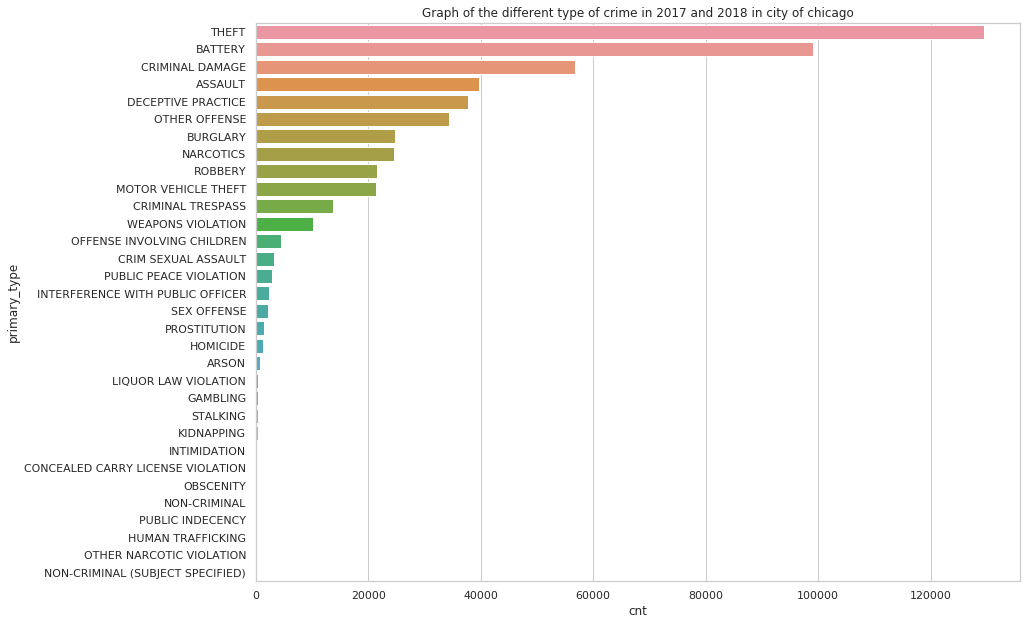

In [8]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
title = 'Graph of the different type of crime in 2017 and 2018 in city of chicago'
ax = sns.barplot(x="cnt", y="primary_type", data=type_cnt, order = type_cnt.primary_type).set_title(title)

#### __Different type of crime change over time__

Text(0.5, 1.0, 'Different type of crime change over time (base on 2017 and 2018 data)')

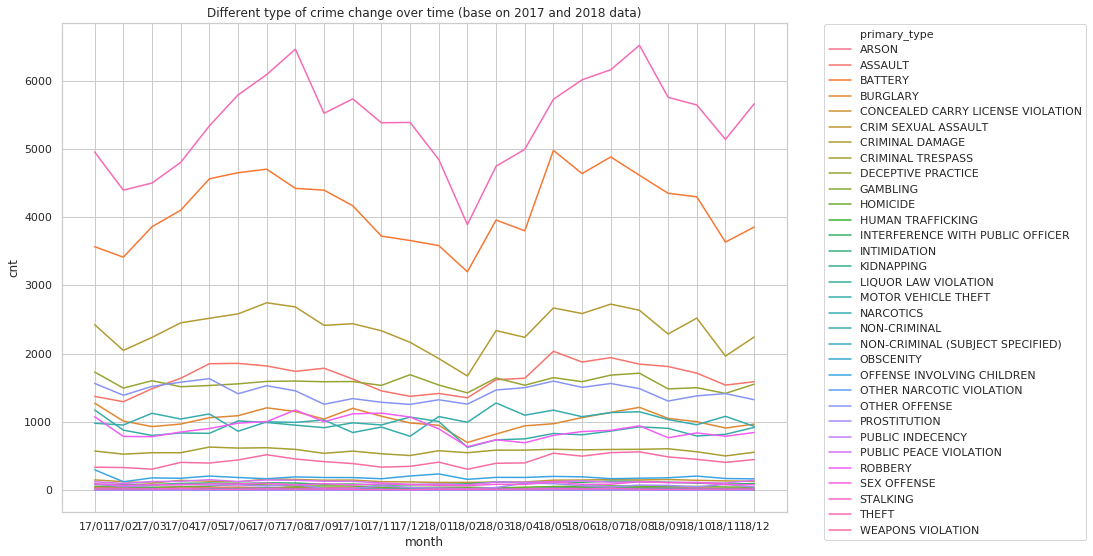

In [9]:
crime_com['month'] = crime_com.date.dt.strftime('%y/%m')
gp = crime_com.groupby([crime_com.month, crime_com.primary_type]).size().reset_index(name="cnt")
pure = gp.pivot(index='month', columns='primary_type', values='cnt').unstack().reset_index(name='cnt')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="cnt", hue="primary_type",legend='brief',
                  style ="primary_type", data = pure, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('Different type of crime change over time (base on 2017 and 2018 data)')

#### Rank the crime by community based on 2017 and 2018 data

In [10]:
gp = crime_com.groupby("community").size().reset_index(name="cnt")
gp.sort_values(by = "cnt", ascending=False, inplace=True)
gp

,community,cnt
5,AUSTIN,30429
47,NEAR NORTH SIDE,25367
41,LOOP,21480
49,NEAR WEST SIDE,18448
52,NORTH LAWNDALE,18377
65,SOUTH SHORE,17325
32,HUMBOLDT PARK,16095
75,WEST TOWN,15625
4,AUBURN GRESHAM,14897
70,WEST ENGLEWOOD,14016


#### Graph of the rank of the crime count by community

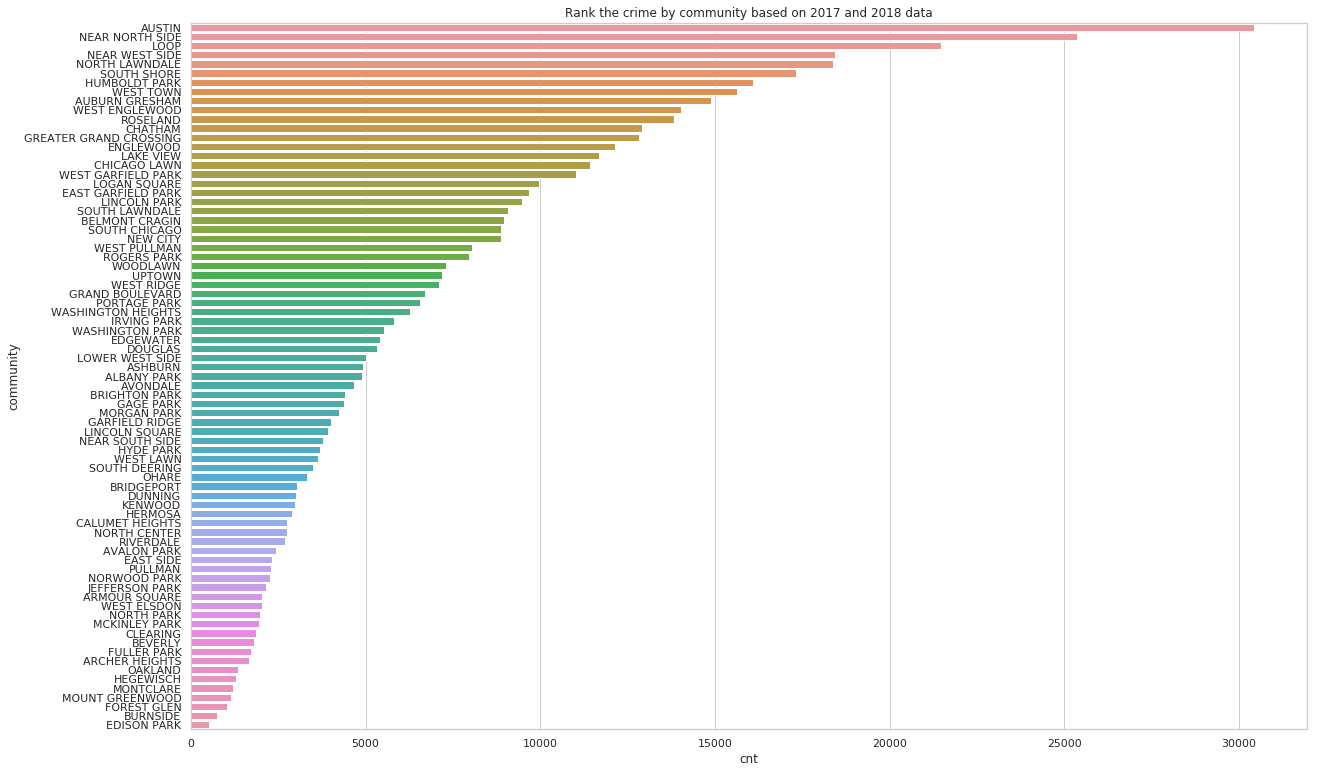

In [11]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
title = 'Rank the crime by community based on 2017 and 2018 data'
ax = sns.barplot(x="cnt", y="community", data=gp, order = gp.community).set_title(title)

#### Heatmap of the crime of 2017 and 2018 in Chicago's 77 neighborhood

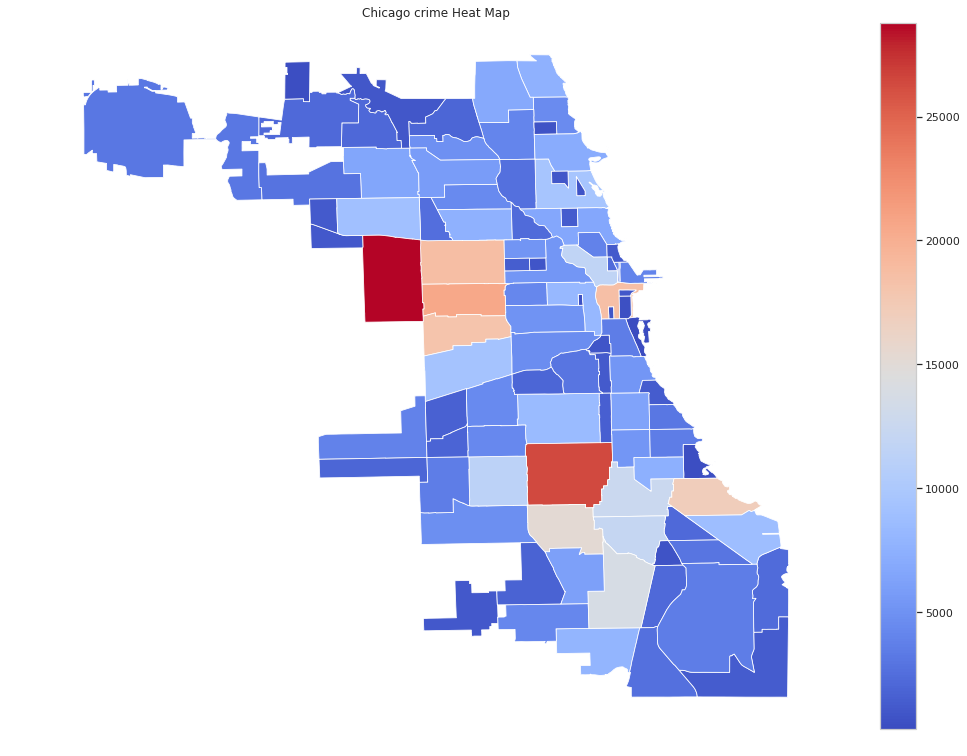

In [44]:
from IPython.display import Image
Image(filename='index.png')

#### Heatmap of the theft of 2017 and 2018 in Chicago's 77 neighborhood

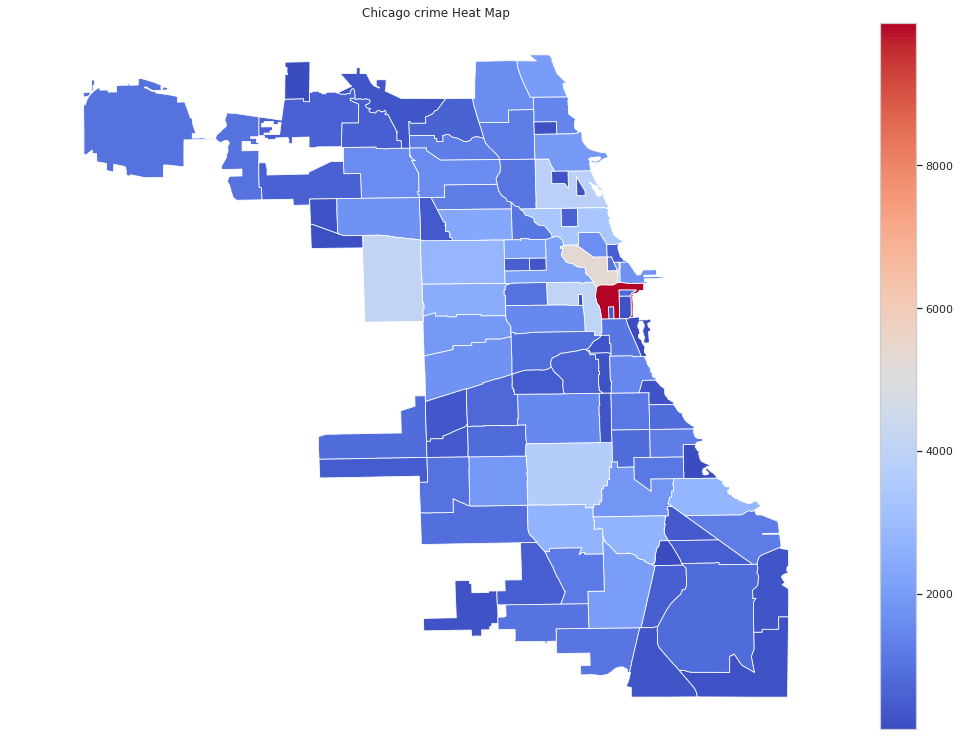

In [45]:
Image(filename='theft.png')

#### Heatmap of the deceptive practice of 2017 and 2018 in Chicago's 77 neighborhood

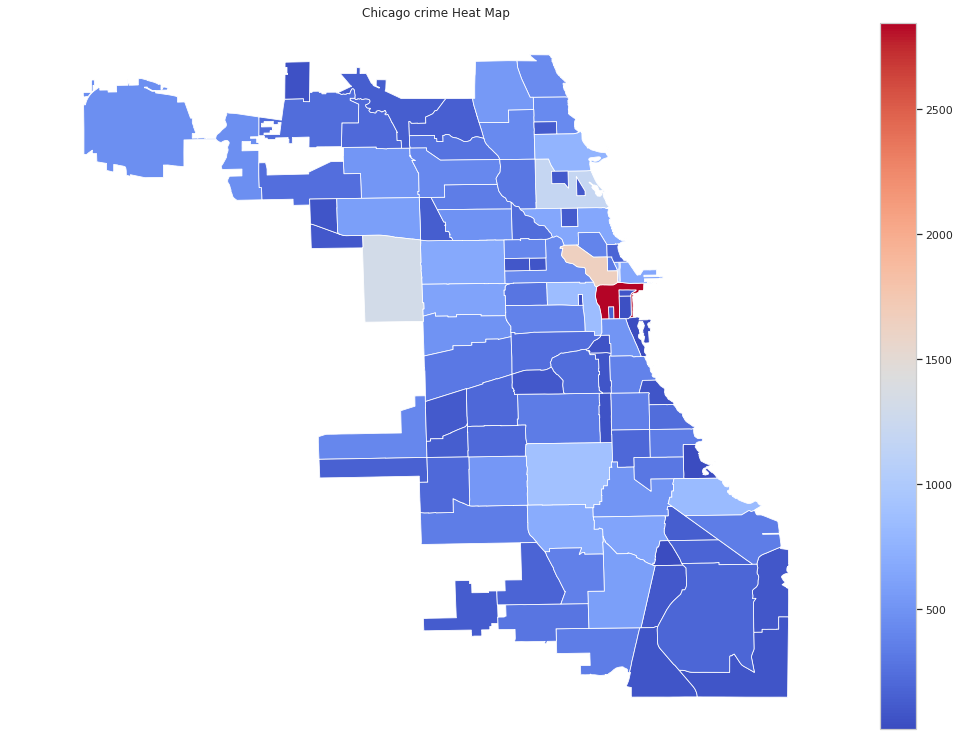

In [46]:
Image(filename='desp.png')

#### Heatmap of the sex offense of 2017 and 2018 in Chicago's 77 neighborhood

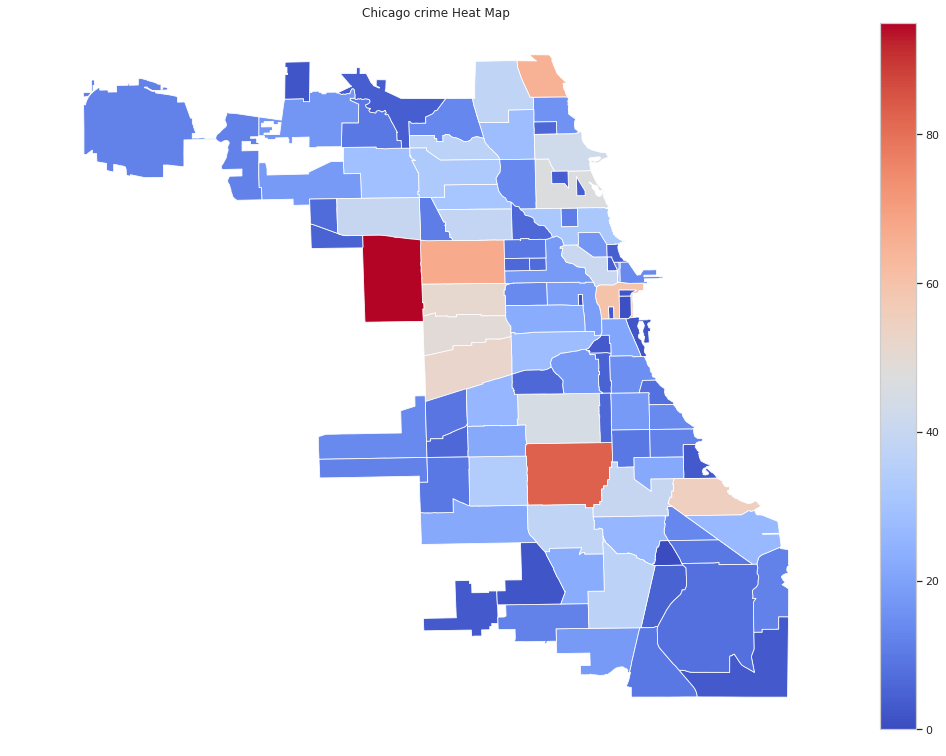

In [47]:
Image(filename='sex.png')

### Conclusion of Problem 1

1. The top 5 types of crime in City of Chicago is: THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, DECEPTIVE PRACTICE. These types covers more than half of the number of the crimes. 

2. Based on the heat map above, we can clearly identify that in the past two years, the most unsafe neiborghoods are AUSTIN and NEAR NORTH SIDE. it follows the previous patten that the crime rate in the west side and south side of chicago is higher than the other communities.

3. When we heat map the homicide type of crime, it shows that the distribution of the homicide is almost the same as the the total crime map. However, if we map the theft heat map, the distribution is very clustered in the downtown area. 

3. From the graph of the crime change based on time, we can tell that the most dangerous felonies have nothing to do with the weather. However, crime like theft clearly is associated with the temperature. It peaks at the summer time, and fall down in the winter time. If we have weather information, we may can get some interesting insight out of it.


## Problem2: Data Augmentation and APIs

In [12]:
import pb_2 as p2

#### Link the ACS data with crime data based on the spatial information
1. get the acs data using acs API
2. convert the crime data into geopandas dataframe
3. Using the API get the 2010's block boundaries of city of chicago and link it with ACS data
4. Join two data set if crime's point is in the acs's block's polygon.

In [13]:
acs = p2.get_acs_data()
acs['black_percentage'] = acs.population_black_alone/ acs.population
acs['white_percentage'] = acs.population_white_alone/ acs.population
acs['high_school_percentage'] = acs.education_high_school/ acs.population
geo_crime = nbhds.convert_to_geodf(crime_com[crime_com.year==2017],'longitude','latitude')
acs_block = p2.link_block(acs)
total_res = p2.link_crime_acs(geo_crime, acs_block)

#### Shrink the dataset only keep the useful information

In [14]:
useful_cols = ['block','case_number','community_area','date','primary_type','year',
              'coordinates', 'population','population_white_alone','population_black_alone'
              ,'education_high_school','total_income','black_percentage','white_percentage',
              'high_school_percentage','geoid','community']
total = total_res[useful_cols]
total.head(5)

,block,case_number,community_area,date,primary_type,year,coordinates,population,population_white_alone,population_black_alone,education_high_school,total_income,black_percentage,white_percentage,high_school_percentage,geoid,community
0,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28 21:43:00,OTHER OFFENSE,2017,POINT (-87.69463767800001 41.843778126),10079.0,2717.0,6792.0,1661.0,300.0,0.673876,0.269570,0.164798,17031843500,SOUTH LAWNDALE
3,033XX S KEDZIE AVE,JA541446,30,2017-12-08 03:00:00,ARSON,2017,POINT (-87.70468577299999 41.832571089),1462.0,1324.0,0.0,236.0,357.0,0.000000,0.905609,0.161423,17031830500,SOUTH LAWNDALE
7,022XX S WHIPPLE ST,JA118524,30,2017-01-16 20:05:00,CRIM SEXUAL ASSAULT,2017,POINT (-87.70155403 41.851031045),1962.0,853.0,0.0,209.0,500.0,0.000000,0.434760,0.106524,17031300900,SOUTH LAWNDALE
22,026XX S SPRINGFIELD AVE,JA212907,30,2017-04-02 15:00:00,OFFENSE INVOLVING CHILDREN,2017,POINT (-87.722090927 41.843617405),1417.0,1078.0,4.0,154.0,338.0,0.002823,0.760762,0.108680,17031301701,SOUTH LAWNDALE
39,026XX S PULASKI RD,JA496791,30,2017-11-03 02:26:00,BURGLARY,2017,POINT (-87.724526231 41.843397077),840.0,457.0,0.0,136.0,232.0,0.000000,0.544048,0.161905,17031301802,SOUTH LAWNDALE


#### Caculate the average percentage of the black people, white people, and people with GED in the whole cook county

In [15]:
acs[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']].describe()

,black_percentage,white_percentage,high_school_percentage,total_income
count,3983.000000,3983.000000,3983.000000,3993.000000
mean,0.272780,0.548742,0.144994,489.997746
std,0.367907,0.328458,0.079555,264.501274
min,0.000000,0.000000,0.000000,0.000000
25%,0.006283,0.261890,0.086699,321.000000
50%,0.054873,0.638753,0.142234,432.000000
75%,0.534718,0.830813,0.196434,600.000000
max,1.000000,1.000000,0.496259,3658.000000


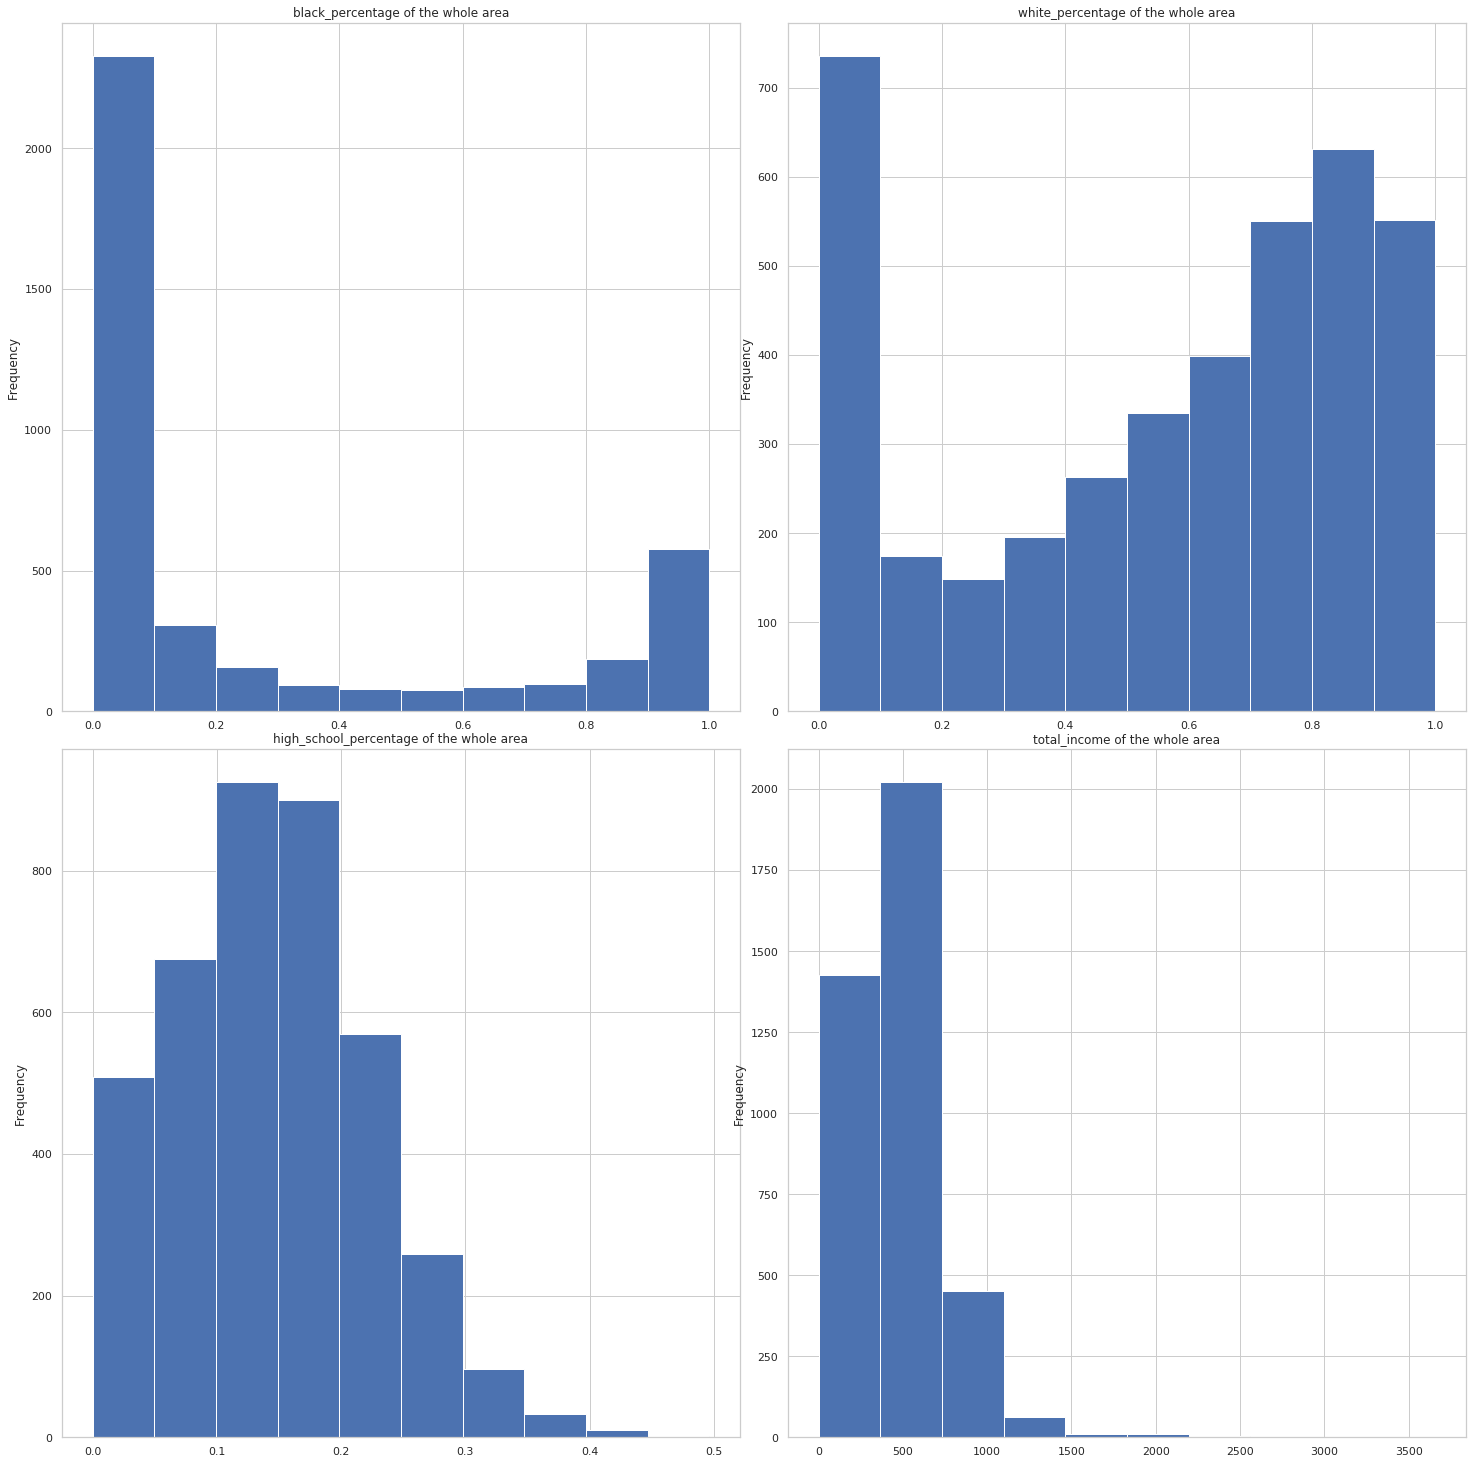

In [16]:
fig_w, fig_h = 20, 20
rows, cols = 2, 2
fig = plt.figure(figsize=(fig_w, fig_h))
rank = [plt.subplot(rows, cols, i) \
        for i in range(1, 5)]

plt.tight_layout(pad=0, w_pad=1, h_pad=1)

temp = acs[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']]

temp.plot(kind='hist',
          y='black_percentage',
          ax=rank[0],
          legend=False,
          title='black_percentage of the whole area')
temp.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax=rank[1],
          title='white_percentage of the whole area')
temp.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax=rank[2],
          title='high_school_percentage of the whole area'
         )
temp.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[3],
          title='total_income of the whole area'
         )

#### Calculate the average of the index of the block that reported 'BATTERY' crime

In [17]:
battery = total[total.primary_type == 'BATTERY']
battery[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']].describe()

,black_percentage,white_percentage,high_school_percentage,total_income
count,48779.000000,48779.000000,48779.000000,49016.000000
mean,0.576159,0.274686,0.149620,470.922515
std,0.413864,0.313483,0.075811,288.750955
min,0.000000,0.000000,0.000000,0.000000
25%,0.082815,0.007353,0.096562,293.000000
50%,0.787629,0.091096,0.145055,400.000000
75%,0.960432,0.551145,0.200332,558.000000
max,1.000000,1.000000,0.405303,2068.000000


#### Compare these four variables with the baseline of the whole area

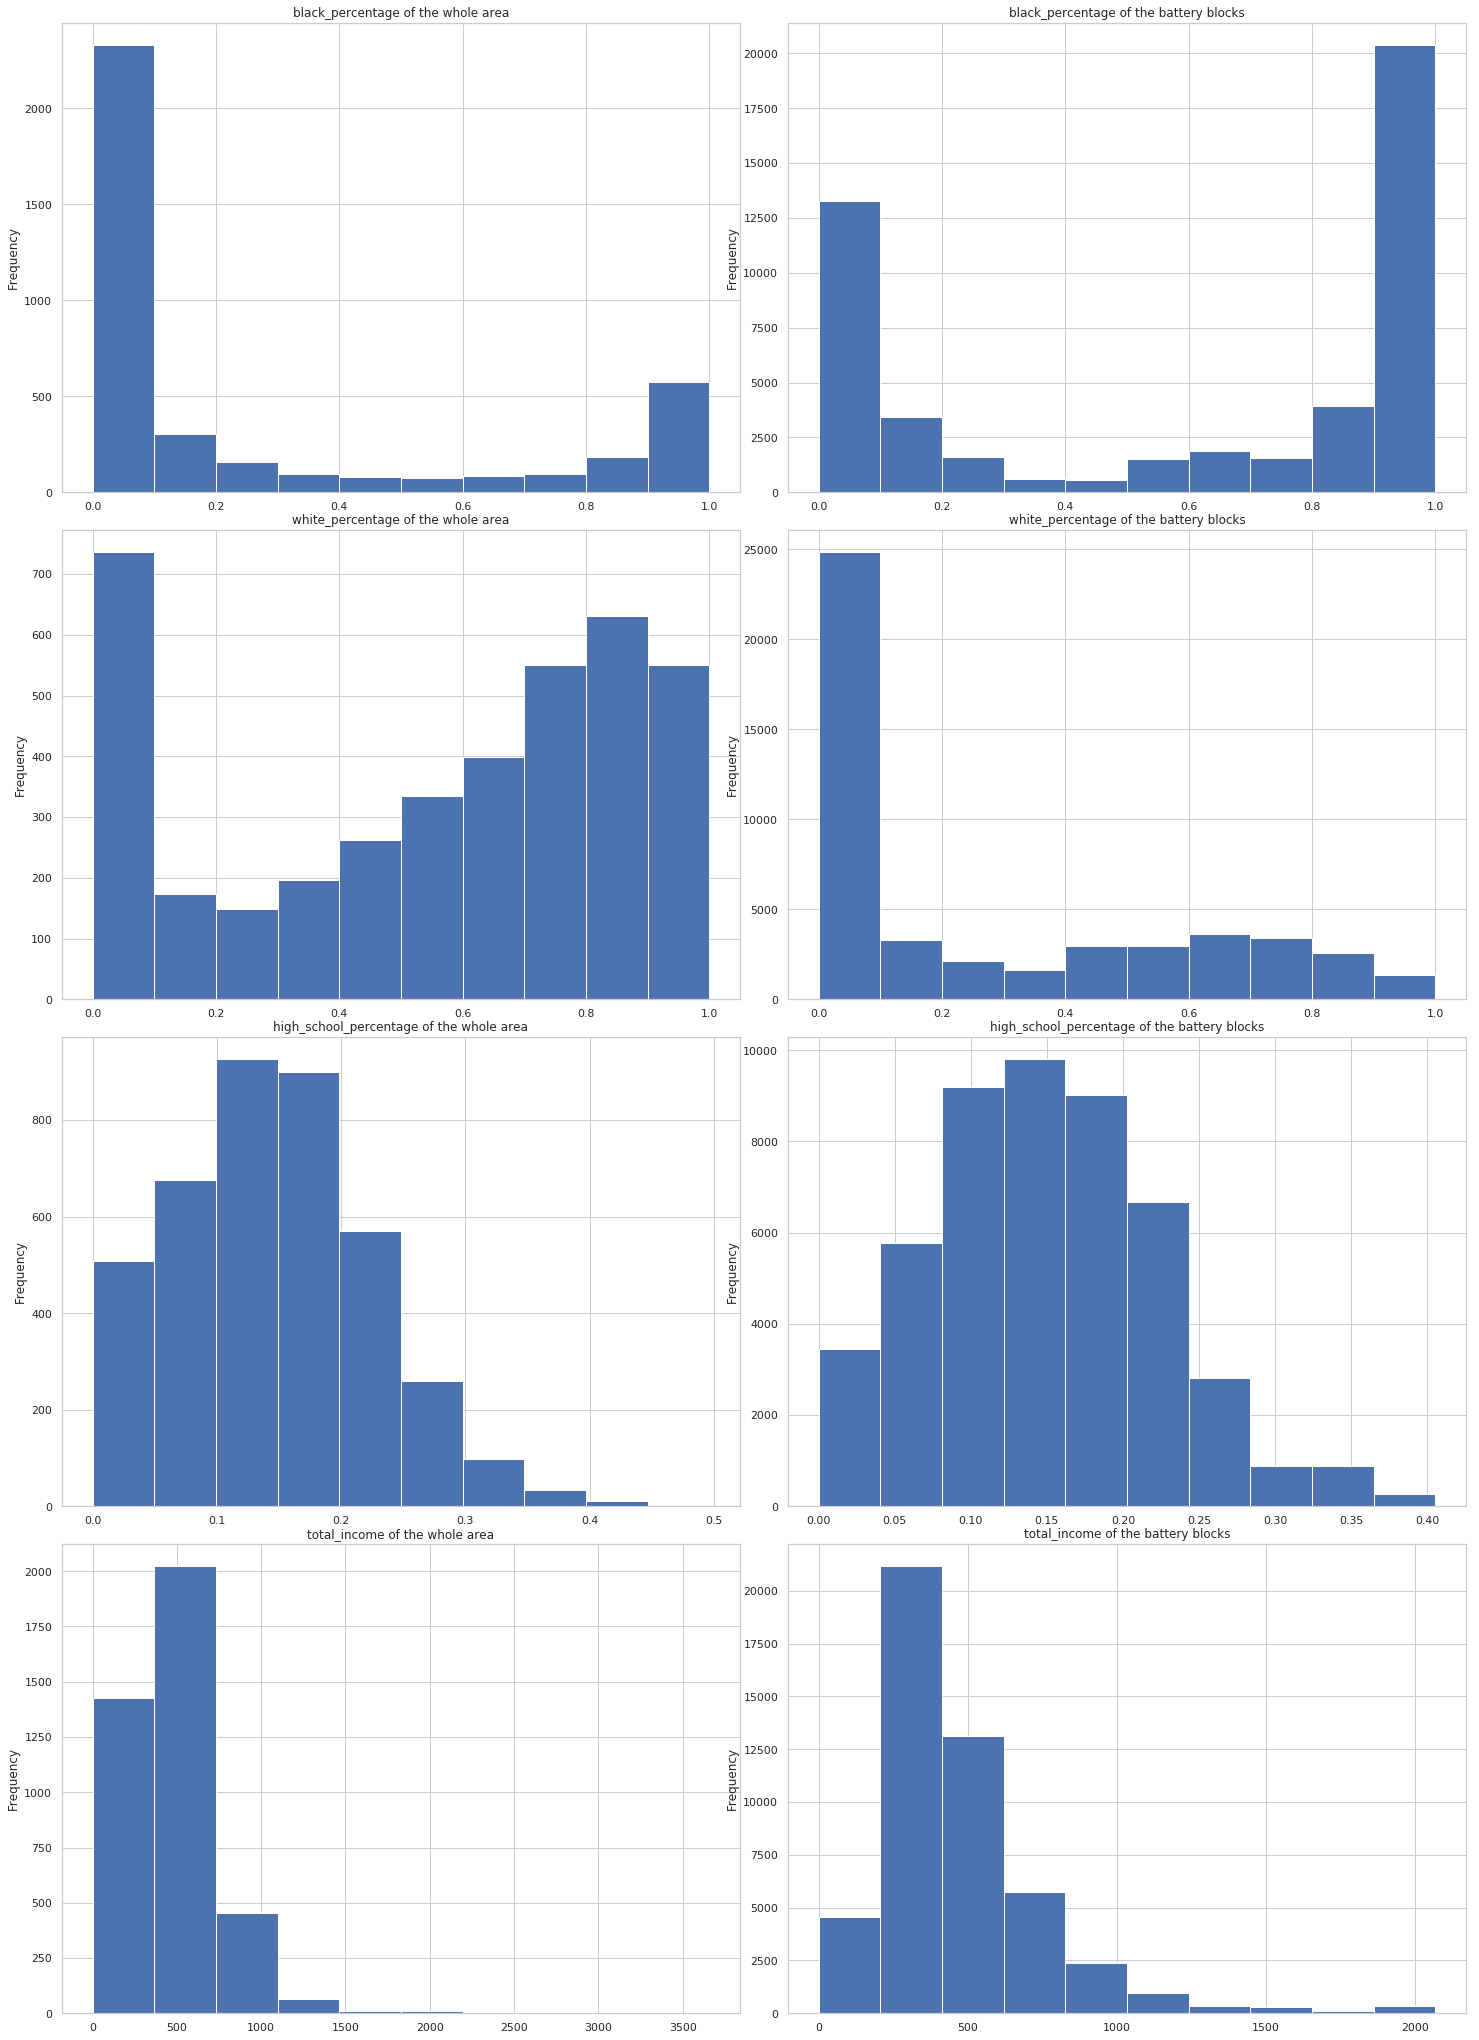

In [18]:
fig_w, fig_h = 20, 28
rows, cols = 4, 2
fig = plt.figure(figsize=(fig_w, fig_h))
rank = [plt.subplot(rows, cols, i) \
        for i in range(1, 9)]

plt.tight_layout(pad=0, w_pad=1, h_pad=1)

temp.plot(kind='hist',
          y='black_percentage',
          ax=rank[0],
          legend=False,
          title='black_percentage of the whole area')
temp.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax=rank[2],
          title='white_percentage of the whole area')
temp.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax=rank[4],
          title='high_school_percentage of the whole area'
         )
temp.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[6],
          title='total_income of the whole area'
         )

temp_battery = battery[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']]

temp_battery.plot(kind='hist',
          y='black_percentage',
          legend=False,
          ax= rank[1],
          title='black_percentage of the battery blocks')
temp_battery.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax= rank[3],
          title='white_percentage of the battery blocks')
temp_battery.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax= rank[5],
          title='high_school_percentage of the battery blocks'
         )
temp_battery.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[7],
          title='total_income of the battery blocks'
         )


### What types of blocks have reports of “Battery”?
1. Compare the black population percentage, these blocks'black_percentage is 57.2% on average, While the whole cook county's figuer is 27% which is less than half of these blocks.From the graph above we can see the distribution of the black_percentage changed a lot from the base line.

2. Compare the white population percentage, these blocks' white_percentage is 27.% on average, while the whole cook county;s figuer is 54.9% which is almost twice of the size of these blocks.

3. Compare the high_school gratudation percentage, there is no difference between these blocks and the county's average level.

4. Compare the total income, these blocks are less than 16 dollars on average of the total income.

__Conclusion: These blocks are more seregated by race than the aveage level and a little poorer than the average level__

#### Calculate the average of the index of the block that reported 'HOMICIDE' crime

In [19]:
homicide = total[total.primary_type == 'HOMICIDE']
homicide[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']].describe()

,black_percentage,white_percentage,high_school_percentage,total_income
count,628.000000,628.000000,628.000000,629.000000
mean,0.705518,0.164311,0.163161,403.602544
std,0.367891,0.245761,0.071933,205.735602
min,0.000000,0.000000,0.000000,0.000000
25%,0.564530,0.000000,0.114461,284.000000
50%,0.904974,0.039002,0.156892,368.000000
75%,0.978819,0.220284,0.205928,505.000000
max,1.000000,0.942270,0.384687,1917.000000


#### Compare these four variables with the baseline of the whole area

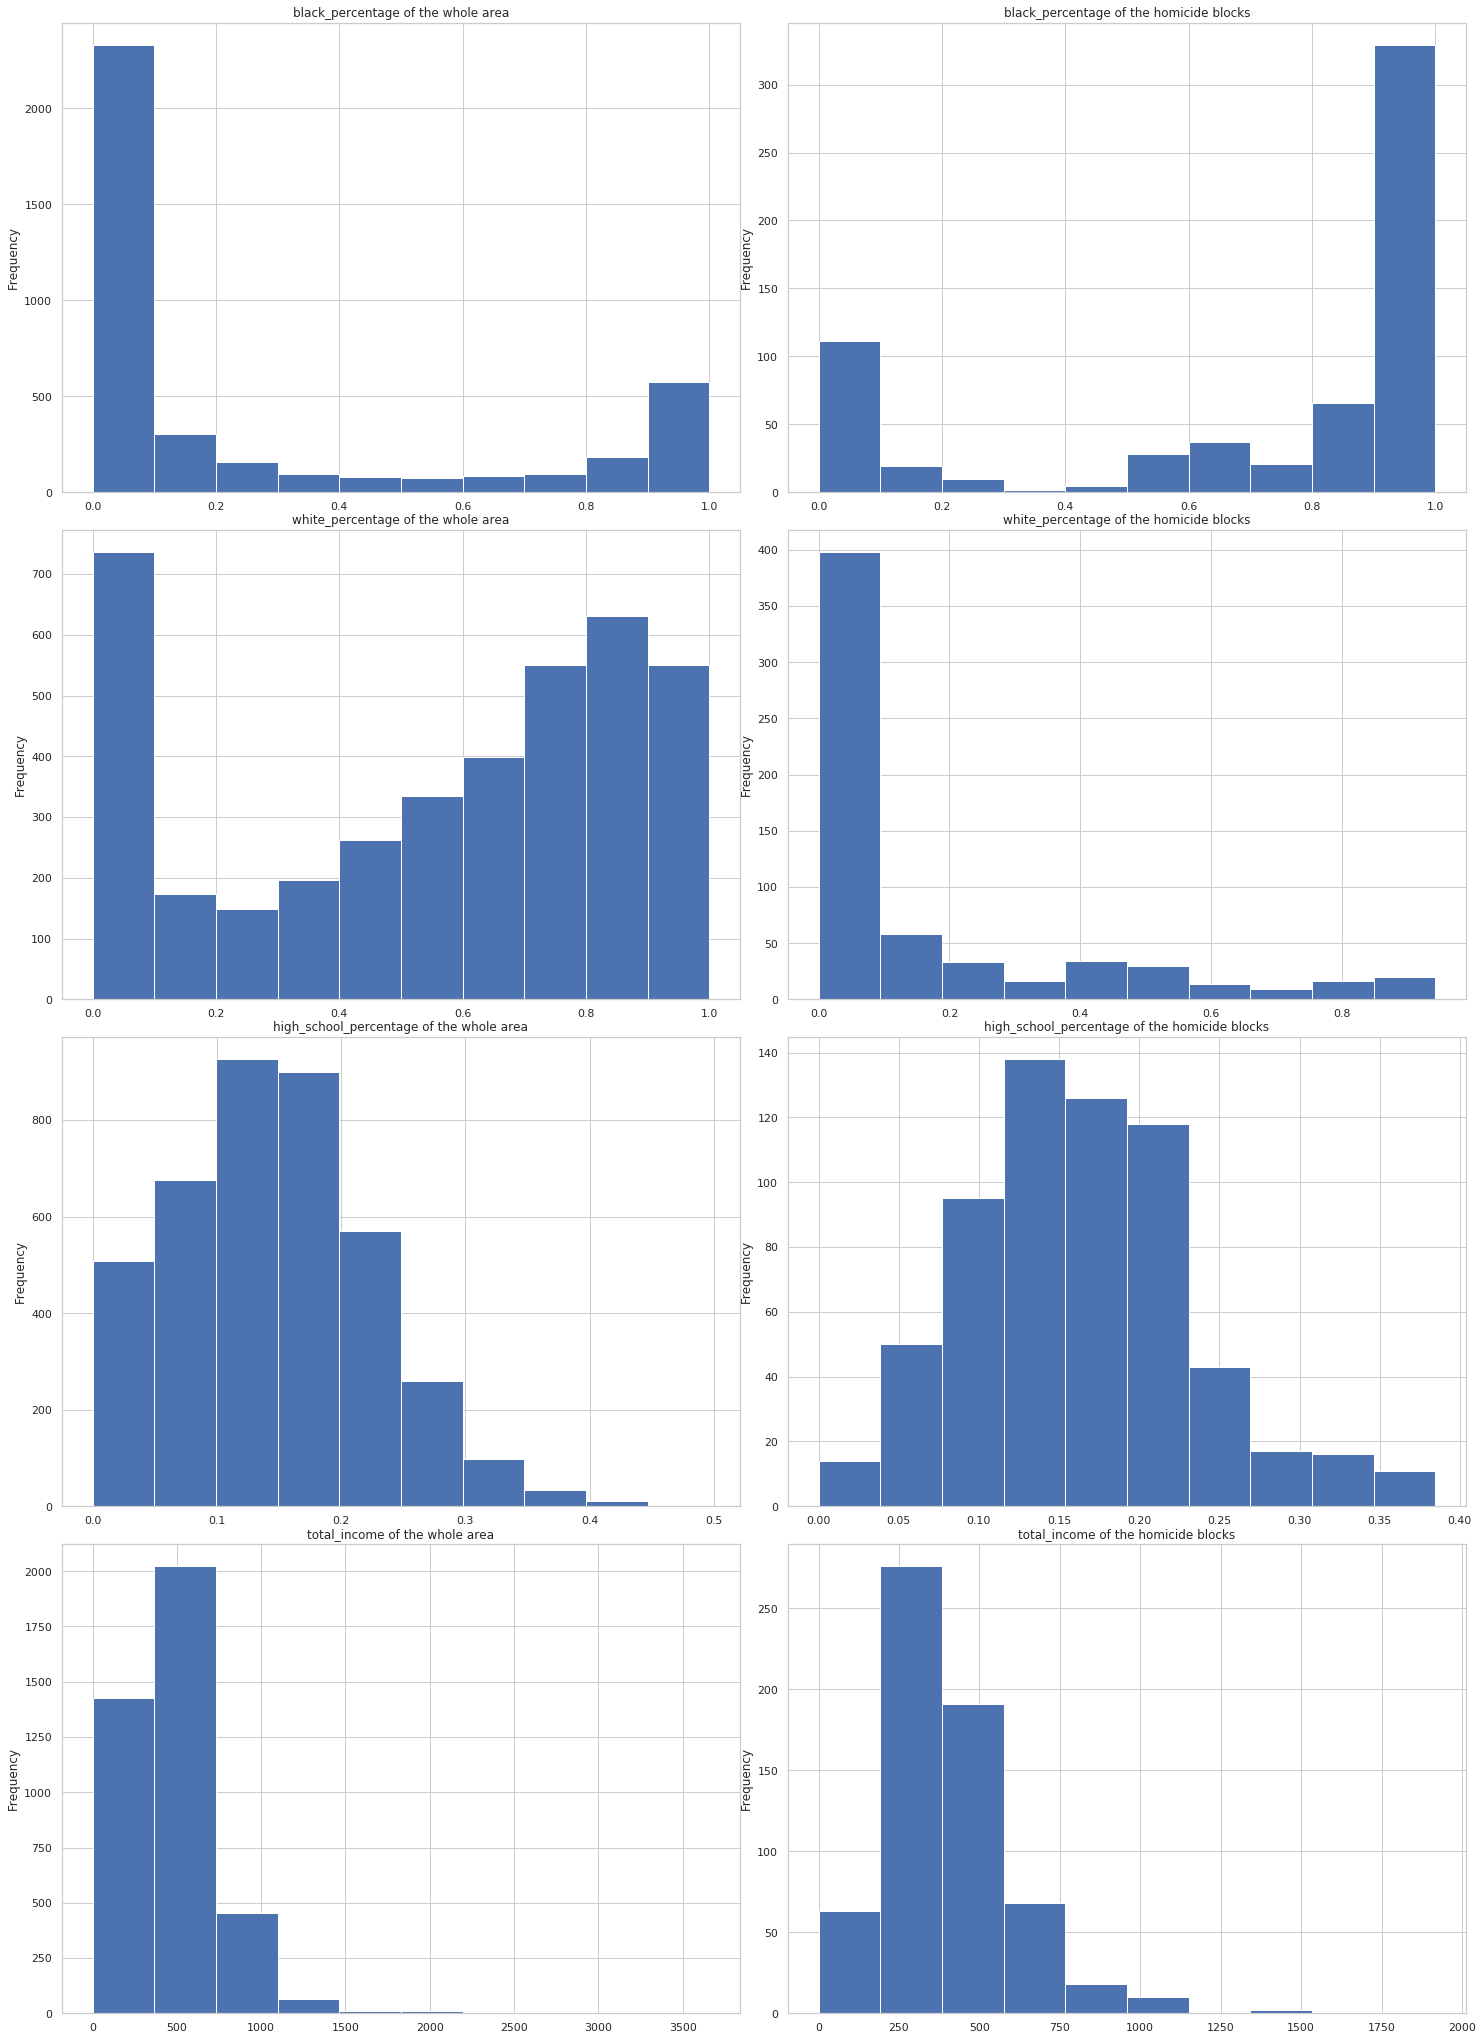

In [20]:
fig_w, fig_h = 20, 28
rows, cols = 4, 2
fig = plt.figure(figsize=(fig_w, fig_h))
rank = [plt.subplot(rows, cols, i) \
        for i in range(1, 9)]

plt.tight_layout(pad=0, w_pad=1, h_pad=1)

temp.plot(kind='hist',
          y='black_percentage',
          ax=rank[0],
          legend=False,
          title='black_percentage of the whole area')
temp.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax=rank[2],
          title='white_percentage of the whole area')
temp.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax=rank[4],
          title='high_school_percentage of the whole area'
         )
temp.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[6],
          title='total_income of the whole area'
         )

temp_homi = homicide[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']]

temp_homi.plot(kind='hist',
          y='black_percentage',
          legend=False,
          ax= rank[1],
          title='black_percentage of the homicide blocks')
temp_homi.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax= rank[3],
          title='white_percentage of the homicide blocks')
temp_homi.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax= rank[5],
          title='high_school_percentage of the homicide blocks'
         )
temp_homi.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[7],
          title='total_income of the homicide blocks'
         )


### What types of blocks get “Homicide”?
1. Compare the black population percentage, these blocks' black_percentage is 71.5% on average, While the whole cook county's figuer is 27% which is less than half of these blocks.

2. Compare the white population percentage, these blocks' white_percentage is 16% on average, while the whole cook county's figuer is 54.9% which is almost three times of the size of these blocks.

3. Compare the high_school gratudation percentage, there is a interesting finding that these blocks's high school gratuation rate is evern higher than the county's average level which is suprising. It needs more research on this topic.

4. Compare the total income, these blocks are less than 87 dollars on average of the total income. It falls dramastically compared to the blocks that reported 'BATTARY'

__Conclusion: These blocks are more seregated by race than the 'BATTERY' blocks and much poorer than the average level__

#### Mapping these four indexes change over time in the whole crime data

Text(0.5, 1.0, 'Black percentage of the block change over time (base on 2017 and 2018 data)')

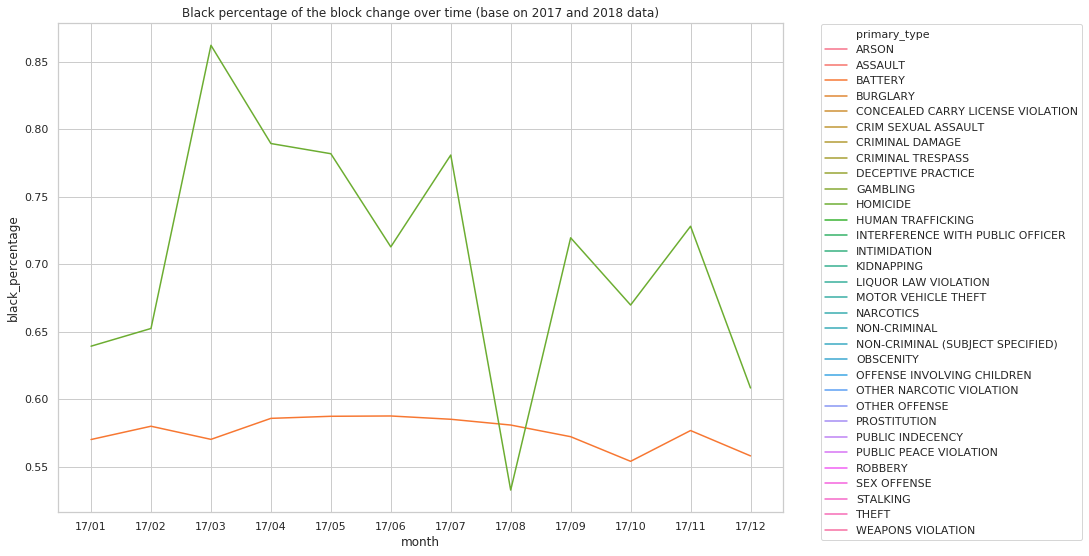

In [21]:
two_types = [homicide, battery]
homi_bat = pd.concat(two_types)
homi_bat['month'] = homi_bat.date.dt.strftime('%y/%m')
groups = homi_bat.groupby([homi_bat.month, homi_bat.primary_type])\
        ['black_percentage'].mean().reset_index(name='black_percentage')
piv = groups.pivot(index='month', columns='primary_type', values='black_percentage')\
         .unstack().reset_index(name='black_percentage')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="black_percentage", hue="primary_type",legend='brief',
                  style ="primary_type", data = piv, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('Black percentage of the block change over time (base on 2017 and 2018 data)')

Text(0.5, 1.0, 'white percentage of the block change over time (base on 2017 and 2018 data)')

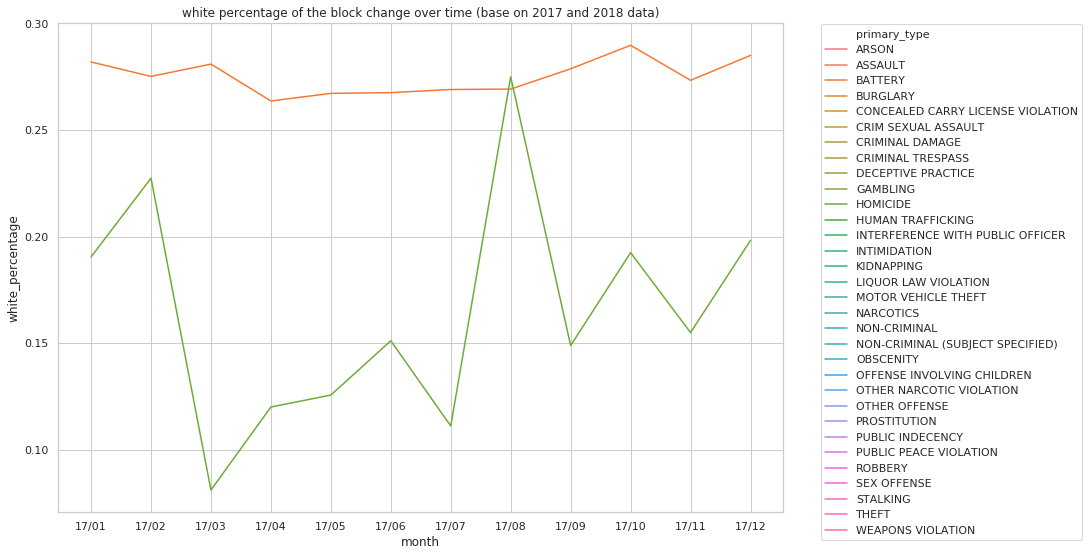

In [22]:
groups = homi_bat.groupby([homi_bat.month, homi_bat.primary_type])\
        ['white_percentage'].mean().reset_index(name='white_percentage')
piv = groups.pivot(index='month', columns='primary_type', values='white_percentage')\
         .unstack().reset_index(name='white_percentage')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="white_percentage", hue="primary_type",legend='brief',
                  style ="primary_type", data = piv, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('white percentage of the block change over time (base on 2017 and 2018 data)')

Text(0.5, 1.0, 'total income of the block change over time (base on 2017 and 2018 data)')

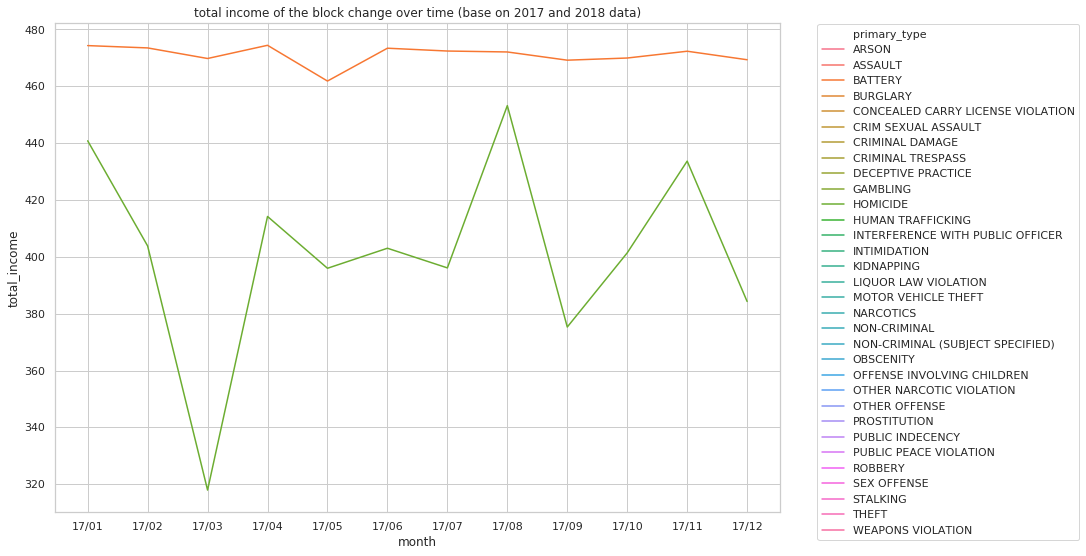

In [23]:
groups = homi_bat.groupby([homi_bat.month, homi_bat.primary_type])\
        ['total_income'].mean().reset_index(name='total_income')
piv = groups.pivot(index='month', columns='primary_type', values='total_income')\
         .unstack().reset_index(name='total_income')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="total_income", hue="primary_type",legend='brief',
                  style ="primary_type", data = piv, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('total income of the block change over time (base on 2017 and 2018 data)')

Text(0.5, 1.0, 'high_school_percentage of the block change over time (base on 2017 and 2018 data)')

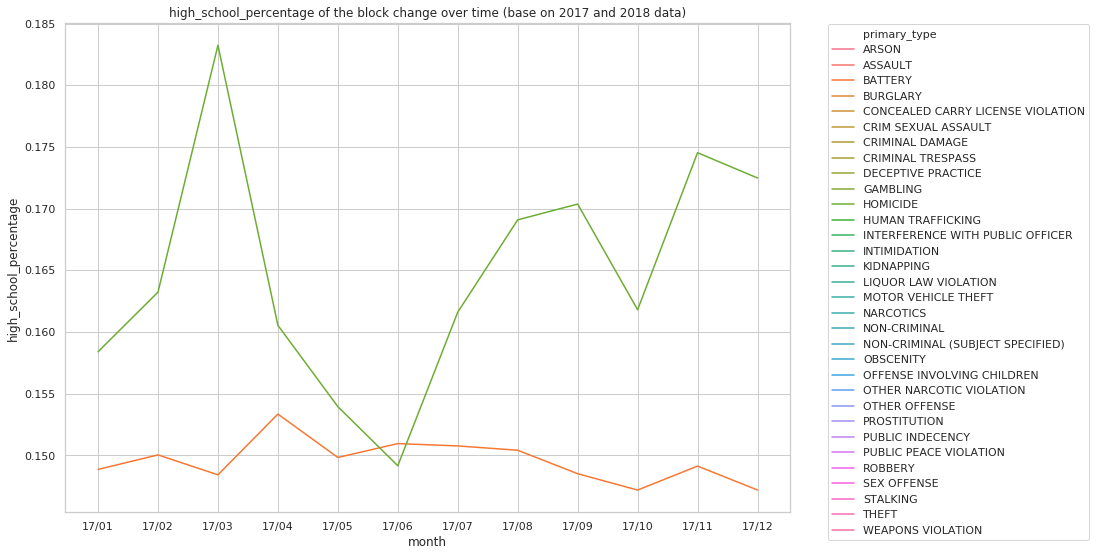

In [24]:
groups = homi_bat.groupby([homi_bat.month, homi_bat.primary_type])\
        ['high_school_percentage'].mean().reset_index(name='high_school_percentage')
piv = groups.pivot(index='month', columns='primary_type', values='high_school_percentage')\
         .unstack().reset_index(name='high_school_percentage')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="high_school_percentage", hue="primary_type",legend='brief',
                  style ="primary_type", data = piv, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('high_school_percentage of the block change over time (base on 2017 and 2018 data)')

### Does that change over time in the data you collected?

There are some fluctuation in the four graphs above. 
1. In total, the battery blocks are richer than the homicide blocks.
2. The graph of the black percentage and white percentage seems complementary with each other. And the battery blocks have more white people than the homicide blocks, and the homicide blocks's black percentage is much higher than that in the battery blocks. 
3. There is a increasing of percentage of high school gratuates in every May. However it's not very clear that it's due to the graduation of high school or not since we don't have many samples in this data.
4. I don't think that the fluctuation of the homicide makes any sense, since we don't have enough data to give the conclusion.  

### Compare the blocks that get “Deceptive Practice” vs “Sex Offense”
#### The statistics of the “Deceptive Practice" blocks

In [25]:
deceptive = total[total.primary_type == 'DECEPTIVE PRACTICE']
deceptive[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']].describe()

,black_percentage,white_percentage,high_school_percentage,total_income
count,17366.000000,17366.000000,17366.000000,17729.000000
mean,0.344879,0.468442,0.113795,624.912234
std,0.393793,0.329859,0.080997,413.730274
min,0.000000,0.000000,0.000000,0.000000
25%,0.026735,0.071832,0.045238,346.000000
50%,0.138041,0.544048,0.105298,510.000000
75%,0.833628,0.762073,0.168007,804.000000
max,1.000000,1.000000,0.405303,2068.000000


#### The statistics of the “Deceptive Practice" blocks

In [26]:
offense = total[total.primary_type == 'SEX OFFENSE']
offense[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']].describe()

,black_percentage,white_percentage,high_school_percentage,total_income
count,933.000000,933.000000,933.000000,938.000000
mean,0.400400,0.404326,0.138455,519.669510
std,0.413917,0.332345,0.079872,336.868122
min,0.000000,0.000000,0.000000,0.000000
25%,0.032741,0.034744,0.079963,314.250000
50%,0.152542,0.460205,0.137367,437.000000
75%,0.914224,0.696592,0.185662,627.000000
max,1.000000,1.000000,0.405303,2068.000000


#### Compare these two kinds of blocks

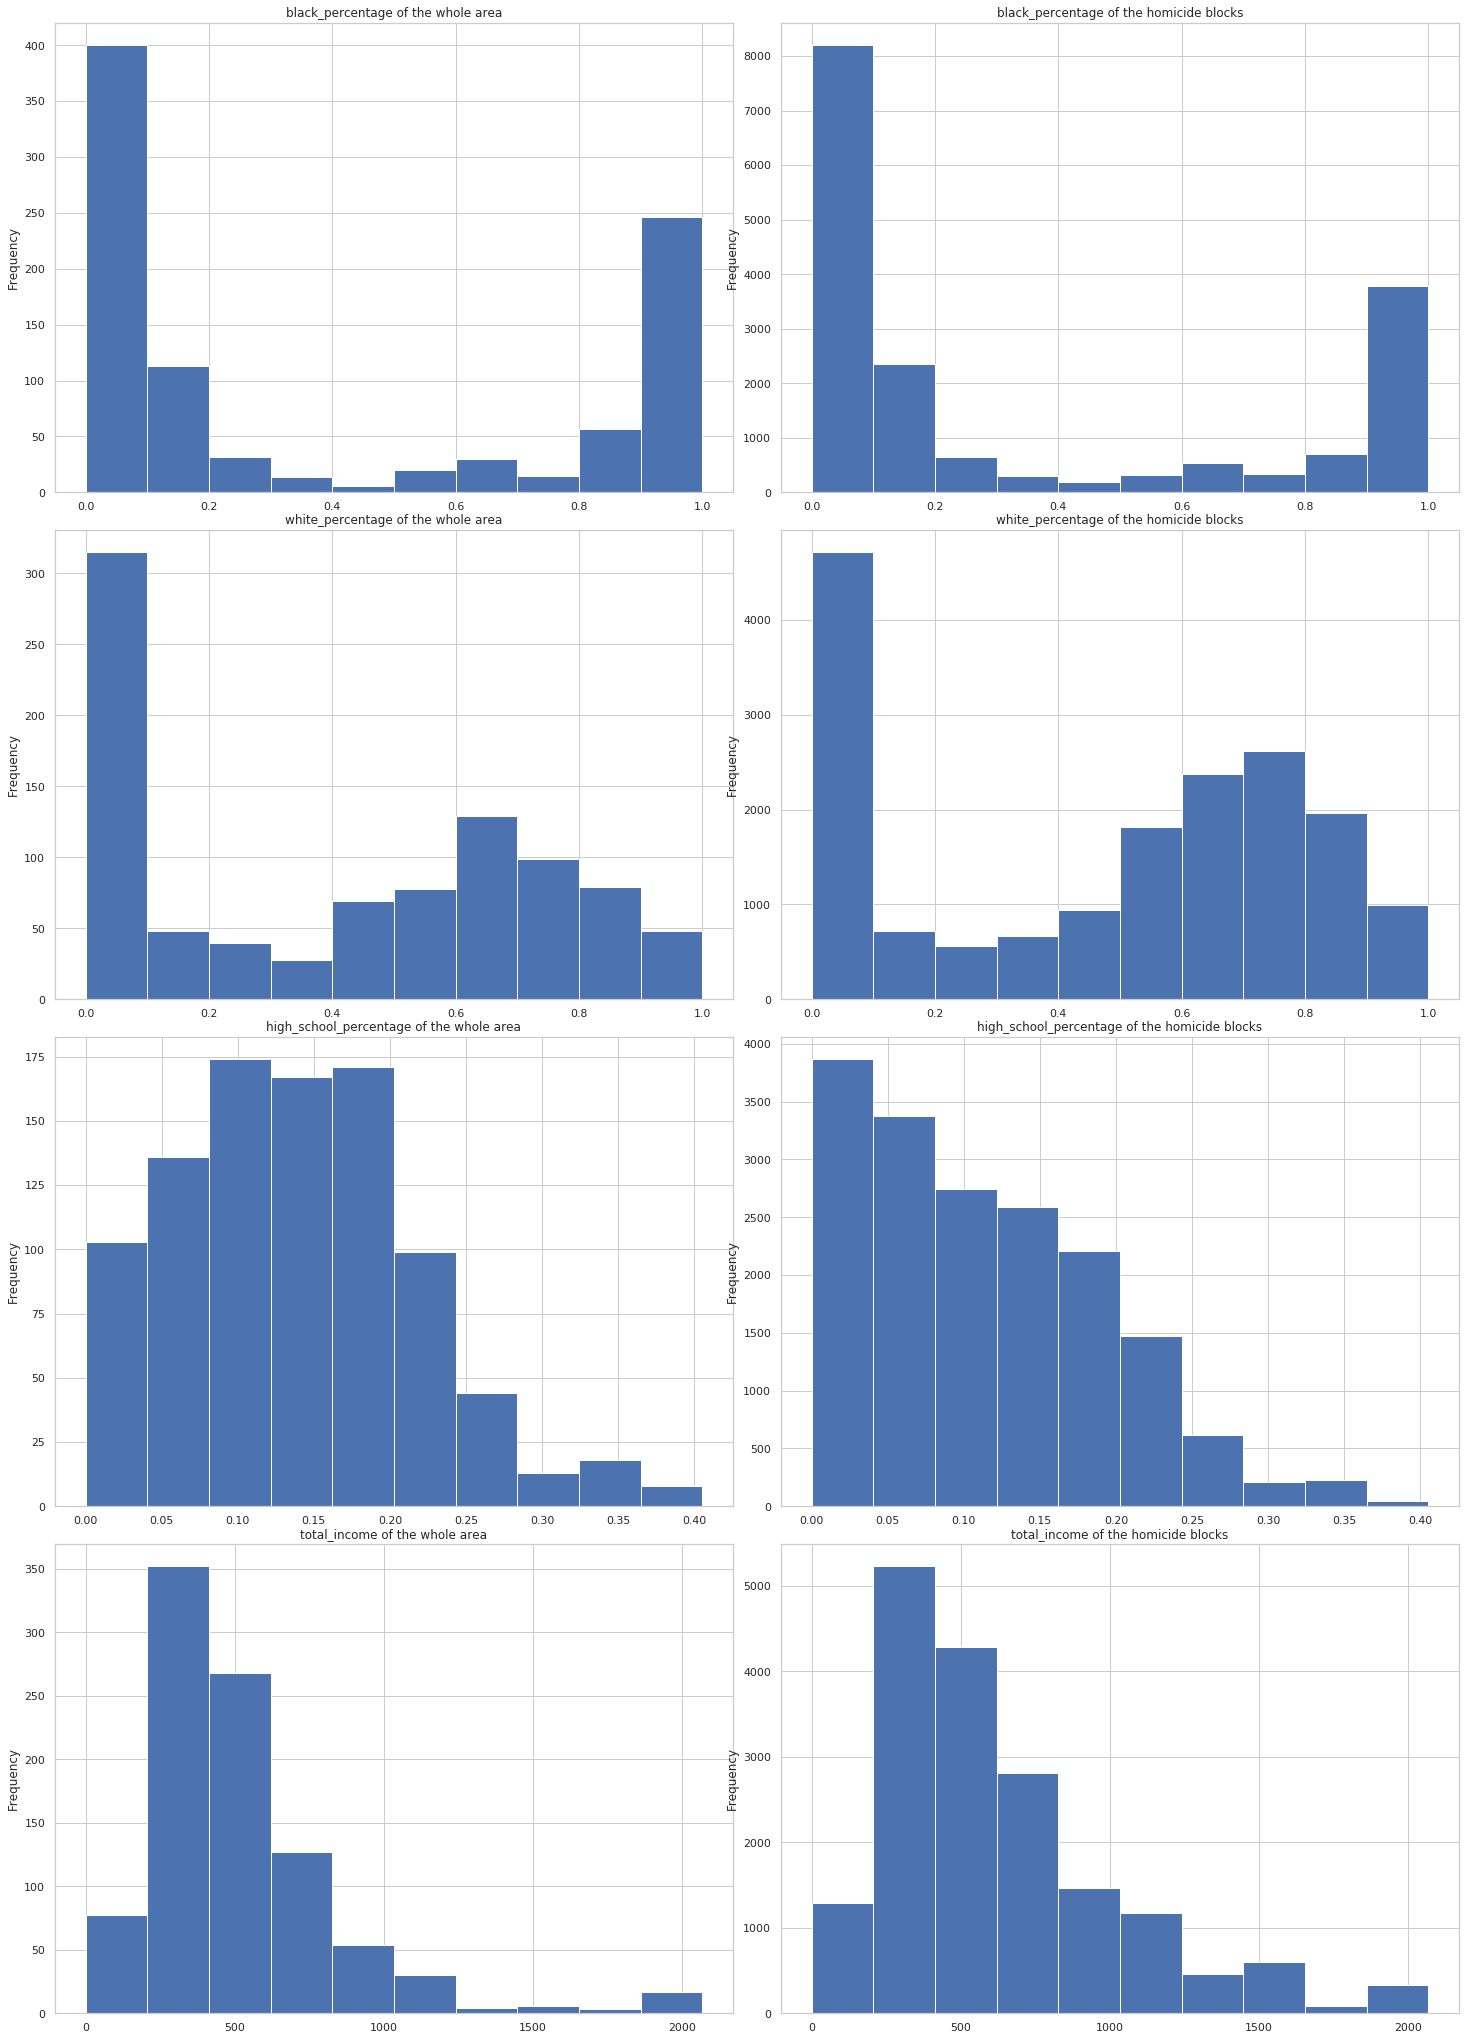

In [27]:
fig_w, fig_h = 20, 28
rows, cols = 4, 2
fig = plt.figure(figsize=(fig_w, fig_h))
rank = [plt.subplot(rows, cols, i) \
        for i in range(1, 9)]

plt.tight_layout(pad=0, w_pad=1, h_pad=1)

temp_off=offense[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']]
temp_off.plot(kind='hist',
          y='black_percentage',
          ax=rank[0],
          legend=False,
          title='black_percentage of the whole area')
temp_off.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax=rank[2],
          title='white_percentage of the whole area')
temp_off.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax=rank[4],
          title='high_school_percentage of the whole area'
         )
temp_off.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[6],
          title='total_income of the whole area'
         )

temp_deceptive = deceptive[['black_percentage',
     'white_percentage',
     'high_school_percentage',
     'total_income']]

temp_deceptive.plot(kind='hist',
          y='black_percentage',
          legend=False,
          ax= rank[1],
          title='black_percentage of the homicide blocks')
temp_deceptive.plot(kind='hist',
          y='white_percentage',
          legend=False,
          ax= rank[3],
          title='white_percentage of the homicide blocks')
temp_deceptive.plot(kind ='hist',
          y='high_school_percentage',
          legend=False,
          ax= rank[5],
          title='high_school_percentage of the homicide blocks'
         )
temp_deceptive.plot(kind ='hist',
          y='total_income',
          legend=False,
          ax= rank[7],
          title='total_income of the homicide blocks'
         )


- Given these 4 index (percentage of black, percentage of white, total income, percentage of high school gratuates), I don't see much difference between these two kinds of blocks in term of the race seragation. 
- However, in term of total income, the "Deceptive Practice" blocks is 110 dollars higher than that in the 'sex offense' blocks which makes sense. Because deceptive practice are more likely to happened in risher area.
- There is significant differences between these two kinds of blocks in term of percentage of high school gratutates. As you can see from the graph above, the sex offense blocks is heavily skewed, there is much fewer data above 0.25.

## Problem3: Analysis and Communication

###  1.Describe how crime has changed in Chicago from 2017 to 2018?

#### The change in total is following:

In [28]:
temp = crime_data.groupby('year').size().reset_index(name='cnt')

#### The change in percentage is following:

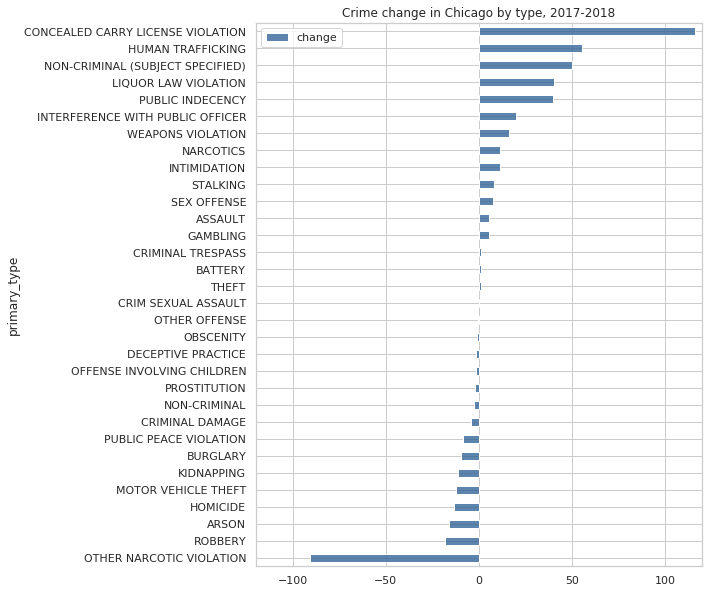

In [29]:
change = crime_data.groupby(['primary_type', 'year'])['case_number']\
    .count().pct_change().reset_index()


change = change.loc[change.year == 2018].sort_values(by='case_number')\
    .rename({'case_number': 'change'}, axis='columns')
change['change']= change['change']*100

change.plot.barh(x='primary_type',y='change',figsize=(8, 10), xlim=(-120, 120),
                color=(0.2, 0.4, 0.6, 0.8),title='Crime change in Chicago by type, 2017-2018',)


In [30]:
change

,primary_type,year,change
45,OTHER NARCOTIC VIOLATION,2018,-90.909091
55,ROBBERY,2018,-18.472678
1,ARSON,2018,-16.216216
21,HOMICIDE,2018,-13.313609
33,MOTOR VEHICLE THEFT,2018,-12.432053
29,KIDNAPPING,2018,-11.052632
7,BURGLARY,2018,-9.776171
53,PUBLIC PEACE VIOLATION,2018,-8.611482
13,CRIMINAL DAMAGE,2018,-4.255905
37,NON-CRIMINAL,2018,-2.631579


- In total, the number of crime in 2017 is 268097, while the number of crime in 2018 is 266272. It droped a 0.7%.
- The top 10 type of crime drop in term of percentage is 

In [31]:
change.head(10)

,primary_type,year,change
45,OTHER NARCOTIC VIOLATION,2018,-90.909091
55,ROBBERY,2018,-18.472678
1,ARSON,2018,-16.216216
21,HOMICIDE,2018,-13.313609
33,MOTOR VEHICLE THEFT,2018,-12.432053
29,KIDNAPPING,2018,-11.052632
7,BURGLARY,2018,-9.776171
53,PUBLIC PEACE VIOLATION,2018,-8.611482
13,CRIMINAL DAMAGE,2018,-4.255905
37,NON-CRIMINAL,2018,-2.631579


However, noticed that there is every few OTHER NARCOTIC VIOLATION or ARSON in the sample. we need to compare the actual number drop between these two years. 

In [32]:
 diff = crime_data.groupby(['primary_type', 'year'])['case_number']\
    .count().reset_index(name='cnt')\
    .pivot(index='primary_type', columns='year', values='cnt')\
    .reset_index()
diff['diff'] = diff[2018] -diff[2017]
diff.sort_values(by='diff').head(10)

year,primary_type,2017,2018,diff
27,ROBBERY,11877,9683,-2194
16,MOTOR VEHICLE THEFT,11406,9988,-1418
3,BURGLARY,13001,11730,-1271
6,CRIMINAL DAMAGE,29042,27806,-1236
8,DECEPTIVE PRACTICE,19028,18733,-295
26,PUBLIC PEACE VIOLATION,1498,1369,-129
23,OTHER OFFENSE,17227,17129,-98
10,HOMICIDE,676,586,-90
0,ARSON,444,372,-72
21,OFFENSE INVOLVING CHILDREN,2269,2228,-41


__As we can see from the table above, the top 10 types of crime drop in actual amount changes compared with the pecentage drop table.__

#### A. Are these statistics correct?
•Robberies --up 21 percent over the same time-frame in 2017

•Aggravated batteries --up 136 percent

•Burglaries --an increase of 50 percent

•Motor vehicle theft --up 41 percent.

In [33]:
crime_2017 = crime_data[crime_data.year==2017]
crime_2018 = crime_data[crime_data.year == 2018]
crime_2017 = crime_2017[crime_2017.ward == 43]
crime_2018 = crime_2018[crime_2018.ward == 43]
week_2017 = crime_2017[crime_2017.date >= '07/20/2017']
week_2017 = week_2017[week_2017.date <'07/27/2017']
week_2018 = crime_2018[crime_2018.date >= '07/20/2018']
week_2018 = week_2018[week_2018.date <'07/27/2018']

In [34]:
week_2017_sum = week_2017.groupby('primary_type').size().reset_index(name="cnt")
week_2018_sum = week_2018.groupby('primary_type').size().reset_index(name="cnt")
compare_week = pd.merge(week_2017_sum, week_2018_sum, on='primary_type')
compare_week.rename(index =str, columns ={'cnt_x':'cnt_2017', 'cnt_y':'cnt_2018'}, inplace=True)
compare_week['compare'] = (compare_week.cnt_2018 - compare_week.cnt_2017)/ compare_week.cnt_2017
compare_4 = compare_week[compare_week['primary_type'].isin({'BATTERY',
                                                           'BURGLARY',
                                                           'MOTOR VEHICLE THEFT',
                                                           'ROBBERY'})]
compare_4

,primary_type,cnt_2017,cnt_2018,compare
2,BATTERY,16,11,-0.312500
3,BURGLARY,3,3,0.000000
16,MOTOR VEHICLE THEFT,3,2,-0.333333
27,ROBBERY,2,4,1.000000


__The alderman candidate are totally lying about every type of the crime__

Based on the data, we have the following conclusion:

•Robberies --increase 100 percent over the same time-frame in 2017

•Aggravated batteries --down 31 percent

•Burglaries -- no change

•Motor vehicle theft --down 33 percent.

__Did crime rise 10 percent in the same 28-day time period since 2017?__

In [35]:
end_18 = pd.Timestamp('2018-07-27')
end_17 = pd.Timestamp('2017-07-27')
period = pd.Timedelta('28 days')
start_18 = end_18 - period
start_17 = end_17 - period
month_17 = crime_2017[(crime_2017['date'] >= start_17) 
                    & (crime_2017['date'] <= end_17)]
month_18 = crime_2018[(crime_2018['date'] >= start_18) 
                    & (crime_2018['date'] <= end_18)]
month_2017_sum = month_17.groupby('primary_type').size().reset_index(name="cnt")
month_2018_sum = month_18.groupby('primary_type').size().reset_index(name="cnt")
compare_month = pd.merge(month_2017_sum, month_2018_sum, on='primary_type')
compare_month.rename(index =str, columns ={'cnt_x':'cnt_2017', 'cnt_y':'cnt_2018'}, inplace=True)
compare_month['compare'] = (compare_month.cnt_2018 - compare_month.cnt_2017)/ compare_month.cnt_2017
compare_month[compare_week['primary_type'].isin({'BATTERY',
                                                'BURGLARY',
                                                'MOTOR VEHICLE THEFT',
                                                'ROBBERY'})]

,primary_type,cnt_2017,cnt_2018,compare
2,BATTERY,41,34,-0.170732
3,BURGLARY,15,14,-0.066667
16,MOTOR VEHICLE THEFT,6,10,0.666667
27,ROBBERY,16,8,-0.500000


The table above shows the change of 4 types of crime in the 28-days period time between year 2017 and year 2018

In [36]:
compare_month.cnt_2018.sum() /compare_month.cnt_2017.sum()

1.1055718475073313

__The candidate didn't lie about this number, it increased by 10.5% in total in that time period between year 2017 and 2018__

__Did crime raise 22 percent since 2016?__
We don't have the crime data of year 2016. Based on the data we have, we can't answer this question.

#### B. Could they be misleading or would you agree with the conclusions he’s drawing? Why or why not?

- This candidate clearly planed to lie to the people.

- He chose the percentage instead of the actual number to exaggerate the crime. For example, for the same week, there were 2 robbery in 2017 of ward 43, and 4 in 2018. In stead of given the true number, he could claim that the robbery increased by 100%. 

- He chose July as the time period on purpose. From the anlysis above we clearly know that the crime peak around the whole year is in July and Auguest. 

- Despite the two methods he used to fool people, his number still doesn't match my results.

__Conclusion: I don't agree with this candidate, he misled people on purpose.__

###  3.As you know, there will be a new mayor in Chicago very soon. Based on these summary statistics, provide 5 key findings to the new mayor’s office about crime in Chicago and what they should focus on in order to deal with crime in Chicago.

#### Deploy the police based on the seasonal pattern

- Clearly, there is a seaonal pattern of crime. The city of chicago can deploy the police based on this pattern. In the summer time, we need more police to partral, and in the winter time, the police department can do some trainning program.

#### Hot-spot policing based on the geographic distribution of the crime

- Based on the crime heat map, the communities of west side and south side of the city of chicago require more policing than the other areas. 


#### Change the housing policy to decrease the seregation of the city of Chicago

- Based on the analysis above, the black neighborhoods are much more dangrous than the white neighborhoods. I think it's very hard to reverse this trend in the most seragated neighborhoods. However, we can see that the seregation is changing over time, we need to focuse on the neighborhoods that still at the edage of this trend.

#### Restrict the rule of dropping kids out of school

- The percentage of the high school gratuates is smaller than the other areas in general. We need to stop dropping teen out of school in the way now.

#### Raise the minimum wage level of chicago

- Raise the minimum wage level can't affect the middle class family and above. However, it increase the total income of the community of poverty, which are also the hot-spot area of crime.

###  4.What are some of the key caveats of your recommendations and limitations of the analysis that you just did?

#### Deploy the police based on the seasonal pattern

- We came to the seasonal pattern based on only two year data which is not enough, if we could have last 10 even 20 crime data, we can draw a more accurate seasonal pattern of crime.

#### Hot-spot policing based on the geographic distribution of the crime

- This policy may create new hot spot. Drive the crime from one small area to a even larger area.

#### Change the housing policy to decrease the seregation of the city of Chicago

- It's very hard to make this kind of policy. Historically, chicago had 'high tower' and 'low tower' policy before. It didn't work well in the past.

- It's very hard to distingush which neighorhood is reverable and which is not ververable.

#### Restrict the rule of dropping kids out of school

- This may lead to some safety problems in schools. If public school don't drop out student, even they made serious mistakes. The percentage of high school gratutates may raise. However, the crime may not change at all.

#### Raise the minimum wage level of chicago

- It's very hard to perswade the employers.

## Problem 4

### A.Of the types of crimesyou have data for, which crime type is the most likely given the call came from 2111 S Michigan Ave?What are the probabilities for each type of request?

__Based on the following table, it's most likly related to theft.__

In [37]:
import censusgeocode as cg

In [38]:
res = cg.onelineaddress('2111 S Michigan Ave, Chicago, IL')
geo_id = res[0]['geographies']['Census Tracts'][0]['GEOID']

In [39]:
crime_in_block = total[total['geoid'] == geo_id]

In [40]:
grouped = crime_in_block.groupby('primary_type').size().reset_index(name="cnt")\
           .sort_values(by = 'cnt',ascending=False)
grouped['percentage'] = grouped.cnt/ grouped.cnt.sum()

#### The probabilites of each type of crime is following:

In [41]:
grouped

,primary_type,cnt,percentage
30,THEFT,389,0.290299
2,BATTERY,215,0.160448
8,DECEPTIVE PRACTICE,211,0.157463
6,CRIMINAL DAMAGE,95,0.070896
1,ASSAULT,75,0.055970
23,OTHER OFFENSE,74,0.055224
27,ROBBERY,68,0.050746
7,CRIMINAL TRESPASS,64,0.047761
16,MOTOR VEHICLE THEFT,61,0.045522
3,BURGLARY,37,0.027612


### B.Let’s now assume that a call comes in about Theft. Which is more likely –that the call came from Garfield Parkor Uptown?How much more or less likely is it to be from Garfield Parkvs Uptown?

In [42]:
theft_data = total[total.primary_type == 'THEFT']
two_community = theft_data[(theft_data['community'] == 'UPTOWN') \
            | (theft_data['community'] == 'EAST GARFIELD PARK') \
            | (theft_data['community'] == 'WEST GARFIELD PARK')].copy()
msk = (two_community.community == "EAST GARFIELD PARK") \
     |(two_community.community == "WEST GARFIELD PARK")
two_community.loc[msk, 'community'] = "GARFIELD PARK"
results = two_community.groupby('community').size().reset_index(name ='cnt')
results['percentage']= results.cnt/results.cnt.sum()
results

,community,cnt,percentage
0,GARFIELD PARK,1150,0.546318
1,UPTOWN,955,0.453682


__It's more likely from GARFIELD PARK__
- P(garfiled park) = 56.3%
- P(uptown) = 43.6%

__As shown above, it is more than 13% as likely that the call came from Garfield Park than Uptown given it's a theft call from only these two communities__

### C. Now assume that you don’t have access to all the raw data and you know the following things:


P(Garifiled|battery) = P(Garifiled & battery)/ P(battery) = 100/260 = 38.5%

P(Uptown|battery) = P(Uptown & battery)/ P(battery) = 160/260 = 61.5%

__As shown above, it is more than 23% as likely that the call came from Garfield Park than Uptown given it's a battery call from only these two communities__

In [43]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')